In this problem, we will fit logistic regression model to a diabetes dataset of female pima indians.
In particular, all patients are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. 

Outcome is 1 if the person has diabetes, 0 if they did not have diabetes.

Predictor variables includes 
- pregnancies - the number of pregnancies the patient has had
- Glucose level
- BloodPressure
- SkinThickness
- Insulin levels
- Body mass Index or BMI
- Age
- Diabetes Pedigree function - An indicator of how the person's ancestory effects their chances of getting diabetes

In [ ]:
# load the diabetes dataset
# make sure to name your database variable as 'diabetes'.
# If you choose to use another name, you will need to modify the code in the next step

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

diabetes = pd.read_csv("diabetes.csv")

X = diabetes.drop(columns=["Outcome"])
y = diabetes["Outcome"]

columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_with_zeros:
    X[column] = X[column].replace(0, X[column].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.7662
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [ ]:
# find the number of rows and columns of the dataset. Hint: use shape

In [10]:
print(diabetes.shape)

(768, 9)


In [ ]:
#print the first 5 rows of the dataset to visualize the columns

In [12]:
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# What is the proportion of pima indians with diabetes in the dataset?

In [14]:
proportion_diabetes = diabetes["Outcome"].mean()
print(f"Proportion of Pima Indians with diabetes: {proportion_diabetes:.4f}")

Proportion of Pima Indians with diabetes: 0.3490


In [20]:
# Run this cell to create a new column derived based on the BMI
# Create Obesity status based on BMI column 

Obese = pd.Series([],dtype='object') 

# Obesity status based on BMI

for i in range(len(diabetes)): 
    if diabetes['BMI'][i] == 0.0: 
        Obese[i]="NA"
    
    elif diabetes['BMI'][i] < 30: 
        Obese[i]="Not Obese"
        
    elif diabetes['BMI'][i] >= 30: 
        Obese[i]="Obese"

In [76]:
diabetes["Obese"] = Obese

In [74]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Obese
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,Not Obese
2,8,183,64,0,0,23.3,0.672,32,1,Not Obese
3,1,89,66,23,94,28.1,0.167,21,0,Not Obese
4,0,137,40,35,168,43.1,2.288,33,1,Obese


In [ ]:
# What is the Probability that a female has diabetes, given that she is obese?
# What is the probablity that a female has diabetes, given that she is not obese?
# Hint: use crosstab with normalization.

In [22]:
diabetes["Obese"] = diabetes["BMI"] >= 30

probabilities = pd.crosstab(diabetes["Obese"], diabetes["Outcome"], normalize=0)

prob_diabetes_given_obese = probabilities.loc[True, 1]
print(f"Probability of diabetes given obesity: {prob_diabetes_given_obese:.4f}")

prob_diabetes_given_not_obese = probabilities.loc[False, 1]
print(f"Probability of diabetes given not being obese: {prob_diabetes_given_not_obese:.4f}")

Probability of diabetes given obesity: 0.4640
Probability of diabetes given not being obese: 0.1655


In [ ]:
# P(Diabetes = yes| Obese) = 0.4640
# P(Diabetes = yes| not obese) = 0.1655

In [ ]:
# Create a histogram of features: Glucose. Do you see any unusual values? 
#(e.g. values that are medically not possible)?

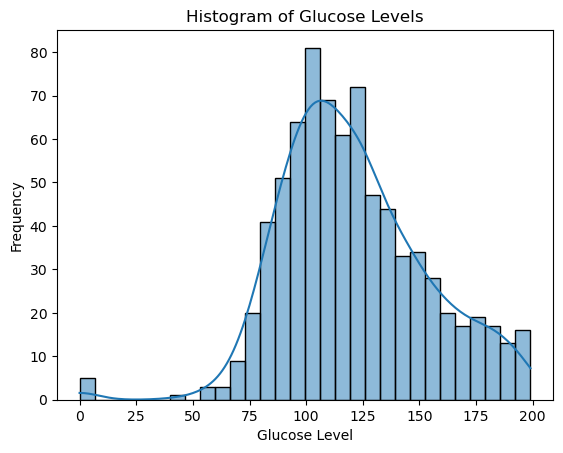

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(diabetes["Glucose"], bins=30, kde=True)
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.title("Histogram of Glucose Levels")
plt.show()

In [ ]:
# Plot the histogram of BloodPressure. Do you see any unusual values? 
# (e.g. values that are medically not possible)

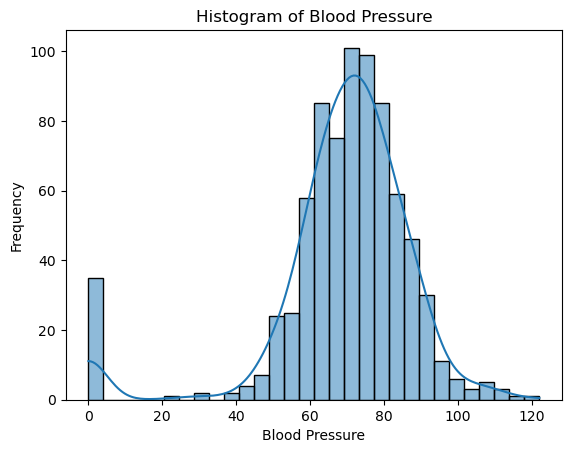

In [26]:
sns.histplot(diabetes["BloodPressure"], bins=30, kde=True)
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.title("Histogram of Blood Pressure")
plt.show()

In [ ]:
# Plot a scatter plot with bloodpressure on y axis, glucose levels on x axis.
# Use a different color for points that have diabetes vs those that dont have diabetes.

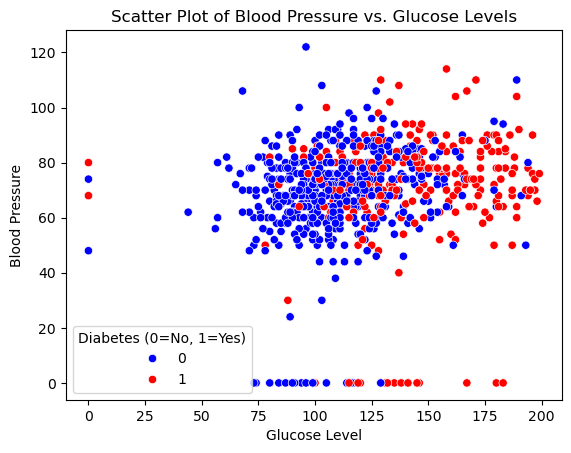

In [28]:
sns.scatterplot(data=diabetes, x="Glucose", y="BloodPressure", hue="Outcome", palette=["blue", "red"])
plt.xlabel("Glucose Level")
plt.ylabel("Blood Pressure")
plt.title("Scatter Plot of Blood Pressure vs. Glucose Levels")
plt.legend(title="Diabetes (0=No, 1=Yes)")
plt.show()


In [ ]:
# Create a new dataframe by removing all rows that have 0 for blood pressure and 0 for glucose.
# these are actually missing values and must be handled by using missing data technqiues
# but for this class, we will simply remove the rows.

In [30]:
diabetes_cleaned = diabetes[(diabetes["BloodPressure"] != 0) & (diabetes["Glucose"] != 0)]

In [ ]:
# Recreate the scatter plot of glucose on x axis, bloodpressure on y axis 
# by using the modifed dataset from above.

# For all the remianing problems, make sure to use this modified dataset

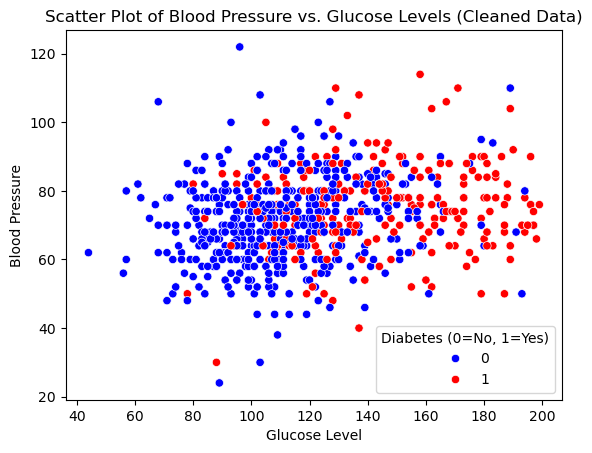

In [32]:
sns.scatterplot(data=diabetes_cleaned, x="Glucose", y="BloodPressure", hue="Outcome", palette=["blue", "red"])
plt.xlabel("Glucose Level")
plt.ylabel("Blood Pressure")
plt.title("Scatter Plot of Blood Pressure vs. Glucose Levels (Cleaned Data)")
plt.legend(title="Diabetes (0=No, 1=Yes)")
plt.show()

In [ ]:
# from the above plot, do you see any relation between glucose and diabetes? 
# between bloodpressure and diabetes? 
# Hint: Try to identify regions with higher values of blood pressure and 
#     higher values of Glucose levels
    

In [34]:
glucose_diabetes_correlation = diabetes_cleaned.groupby("Outcome")["Glucose"].mean()
bloodpressure_diabetes_correlation = diabetes_cleaned.groupby("Outcome")["BloodPressure"].mean()

print("Average Glucose Levels by Outcome:")
print(glucose_diabetes_correlation)
print("\nAverage Blood Pressure by Outcome:")
print(bloodpressure_diabetes_correlation)

Average Glucose Levels by Outcome:
Outcome
0    111.064854
1    142.540000
Name: Glucose, dtype: float64

Average Blood Pressure by Outcome:
Outcome
0    70.924686
1    75.332000
Name: BloodPressure, dtype: float64


In [ ]:
# Create a boxplot with outcome on the x axis and pregnancy on the y axis. 
# Do you see any difference the distribution of pregnancies for diabetic and non diabetic people?

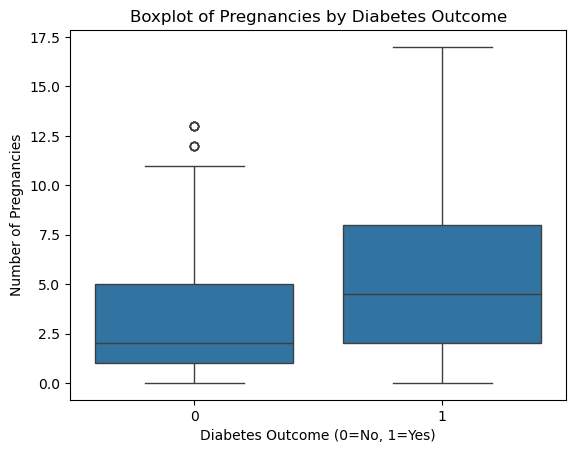

In [36]:
sns.boxplot(data=diabetes_cleaned, x="Outcome", y="Pregnancies")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("Number of Pregnancies")
plt.title("Boxplot of Pregnancies by Diabetes Outcome")
plt.show()

In [ ]:
From the boxplot, we can observe that individuals with diabetes (Outcome = 1) tend to have a slightly higher median number of pregnancies compared to those without diabetes (Outcome = 0). The IQR for diabetic individuals appears to be wider, indicating greater variability in the number of pregnancies. Additionally, there may be more outliers among diabetic individuals, suggesting that a higher number of pregnancies could be associated with an increased risk of diabetes. However, there is still a significant overlap between the two groups, meaning that pregnancies alone are not a strong predictor of diabetes.

In [ ]:
# Create a boxplot with outcome on the x axis and BMI on the y axis. 
# Do you see any differences in the distribution of BMI 
# for diabetic and non diabetic people?

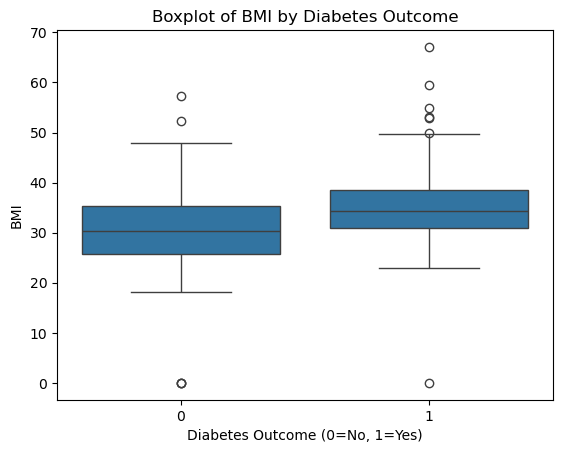

In [38]:
sns.boxplot(data=diabetes_cleaned, x="Outcome", y="BMI")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.title("Boxplot of BMI by Diabetes Outcome")
plt.show()

In [ ]:
# Create a boxplot with outcome on the x axis and age on the y axis. 
# Do you see any differences in the distribution of BMI 
# for diabetic and non diabetic people?

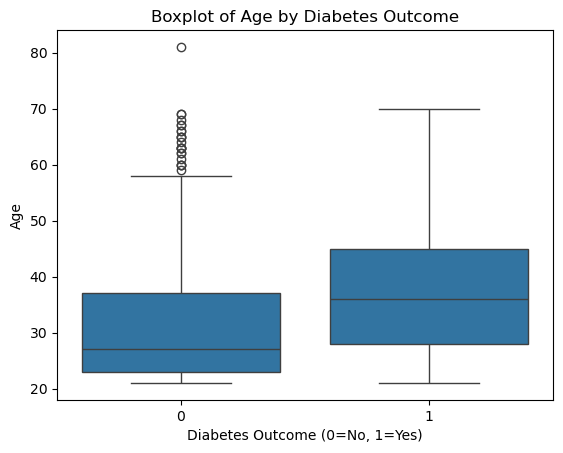

In [40]:
sns.boxplot(data=diabetes_cleaned, x="Outcome", y="Age")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("Age")
plt.title("Boxplot of Age by Diabetes Outcome")
plt.show()

# Fitting Logistic Regression

In [ ]:
# Fit a logistic regression model using the following predictors:
# 1. Glucose, BloodPressure, Age, BMI, Pregnancies, Insulin
#Use the Outcome vaiable as the y.
#Note: We dont need to create a dummy variable here, since the outcome is already coded as 0 or 1.

# use statsmodels.api to fit the model.


In [42]:
import statsmodels.api as sm

X = diabetes_cleaned[["Glucose", "BloodPressure", "Age", "BMI", "Pregnancies", "Insulin"]]
X = sm.add_constant(X)
y = diabetes_cleaned["Outcome"]

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.473027
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  728
Model:                          Logit   Df Residuals:                      721
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.2647
Time:                        13:26:27   Log-Likelihood:                -344.36
converged:                       True   LL-Null:                       -468.30
Covariance Type:            nonrobust   LLR p-value:                 1.168e-50
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.5492      0.797    -10.730      0.000     -10.111      -6.988
Glucose           0.

In [ ]:
# Check the p-values 
# are there any variables that are not significant (i.e. pvalue greater than 0.05?)

In [44]:
print(result.pvalues)

const            7.362950e-27
Glucose          6.762475e-22
BloodPressure    3.079864e-01
Age              8.829197e-02
BMI              4.710771e-09
Pregnancies      6.309550e-04
Insulin          3.726571e-01
dtype: float64


In [ ]:
# Use only the significant features from above and refit the model again

In [68]:
significant_features = result.pvalues[result.pvalues <= 0.05].index
significant_features = [feature for feature in significant_features if feature in diabetes_cleaned.columns]

X_significant = diabetes_cleaned[significant_features]
X_significant = sm.add_constant(X_significant)

logit_model_significant = sm.Logit(y, X_significant)
result_significant = logit_model_significant.fit()

print(result_significant.summary())

Optimization terminated successfully.
         Current function value: 0.475919
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  728
Model:                          Logit   Df Residuals:                      724
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.2602
Time:                        13:36:23   Log-Likelihood:                -346.47
converged:                       True   LL-Null:                       -468.30
Covariance Type:            nonrobust   LLR p-value:                 1.536e-52
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.4787      0.679    -12.484      0.000      -9.810      -7.148
Glucose         0.0361    

In [131]:
# Logistic regression in sklearn

# Now fit the model in sklearn using the significant features you found in the previous step
# make sure to use the penalty = "none" option when creating the logistic regression model


In [56]:
significant_features = result.pvalues[result.pvalues <= 0.05].index
significant_features = significant_features[significant_features != "const"]  # Exclude "const"

X_significant = diabetes_cleaned[significant_features]
X_significant = sm.add_constant(X_significant)

logit_model_significant = sm.Logit(y, X_significant)
result_significant = logit_model_significant.fit()

print(result_significant.summary())

Optimization terminated successfully.
         Current function value: 0.475919
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  728
Model:                          Logit   Df Residuals:                      724
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.2602
Time:                        13:33:27   Log-Likelihood:                -346.47
converged:                       True   LL-Null:                       -468.30
Covariance Type:            nonrobust   LLR p-value:                 1.536e-52
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.4787      0.679    -12.484      0.000      -9.810      -7.148
Glucose         0.0361    

In [ ]:
# What is the probability of a pima indian to have diabetes if her 
# Glucose level is 100, BMI is 20 and she has had 3 pregnancies?

In [58]:
significant_features = list(result_significant.params.index)

new_data = pd.DataFrame([[1, 100, 20, 3]], columns=significant_features)

probability = result_significant.predict(new_data)[0]

print(f"Predicted probability of diabetes: {probability:.4f}")

Predicted probability of diabetes: 0.0573


In [ ]:
# What is the probability of a pima indian to have diabetes if her 
# Glucose level is 180, BMI is 20 and she has had 3 pregnancies?

In [60]:
new_data = pd.DataFrame([[1, 180, 20, 3]], columns=significant_features)

probability = result_significant.predict(new_data)[0]

print(f"Predicted probability of diabetes: {probability:.4f}")

Predicted probability of diabetes: 0.5228


In [ ]:
# what are the increase in odds of having diabetes if the number of pregnancies 
# increases by 1 unit?


In [64]:
import numpy as np

odds_ratio = np.exp(result_significant.params["Pregnancies"])
print(f"Increase in odds of having diabetes for each additional pregnancy: {odds_ratio:.4f}")

Increase in odds of having diabetes for each additional pregnancy: 1.1501
